In [2]:
import warnings

warnings.filterwarnings('ignore')

import os
ROOT_DIR = os.getcwd()[:-28] # verify this points to the root directory of the project

from nba.common import add_game_log_lag, add_game_log_last_5
from tools.modeling.deprecated.hyperparamtuner import HyperParamTuner
from tools.modeling.deprecated.modeler import Modeler
import nba.constants as c

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from hyperopt import hp

import numpy as np
import pandas as pd

import glob
import shap


SEED = 1
early_stopping = 50
season = c.SEASON_2022_2023
player_game_log_path = ROOT_DIR + 'data/game_logs/2022-23/player'
player_game_log_csv_files = glob.glob(os.path.join(player_game_log_path, '*.csv'))
log = pd.DataFrame()

ROOT_DIR

'/Users/rmcdevi2/Projects/personal/nba-analysis/'

In [3]:
# Get Data
for f in player_game_log_csv_files:
    df = pd.read_csv(f)
    log = pd.concat([log, df], ignore_index=True)

log.to_csv(ROOT_DIR + '/data/game_logs/2022-23/player_game_log_2022-2023', index=False)
log

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,SEASON,OPP_TEAM_ID
0,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201181,2023-04-04,PHI vs. BOS,W,...,4,0,1,0,5,2,5,17,2022-23,1.610613e+09
1,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201174,2023-04-02,PHI @ MIL,L,...,1,1,0,1,1,4,29,-13,2022-23,1.610613e+09
2,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201150,2023-03-31,PHI vs. TOR,W,...,0,0,0,0,2,5,13,0,2022-23,1.610613e+09
3,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201139,2023-03-29,PHI vs. DAL,W,...,1,2,0,0,3,3,22,8,2022-23,1.610613e+09
4,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201126,2023-03-27,PHI @ DEN,L,...,0,3,0,0,1,3,29,-10,2022-23,1.610613e+09
5,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201110,2023-03-25,PHI @ PHX,L,...,3,1,0,0,1,3,37,-9,2022-23,1.610613e+09
6,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201103,2023-03-24,PHI @ GSW,L,...,1,1,0,0,4,3,21,-17,2022-23,1.610613e+09
7,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201087,2023-03-22,PHI @ CHI,W,...,0,1,0,0,1,1,21,35,2022-23,1.610613e+09
8,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201072,2023-03-20,PHI vs. CHI,L,...,2,0,1,1,1,2,22,9,2022-23,1.610613e+09
9,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201057,2023-03-18,PHI @ IND,W,...,0,1,0,2,2,1,31,15,2022-23,1.610613e+09


In [4]:
# Clean Data
log = add_game_log_lag(log)
log = add_game_log_last_5(log)
log.sort_values(by=[c.GAME_DATE])
log

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FG_PCT_LAST_5,FGM_LAST_5,FGA_LAST_5,FG3M_LAST_5,FG3A_LAST_5,FG3_PCT_LAST_5,FTM_LAST_5,FTA_LAST_5,FT_PCT_LAST_5,PLUS_MINUS_LAST_5
59,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200001,2022-10-18,PHI @ BOS,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200015,2022-10-20,PHI vs. MIL,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200028,2022-10-22,PHI vs. SAS,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200044,2022-10-24,PHI vs. IND,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200059,2022-10-26,PHI @ TOR,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200073,2022-10-28,PHI @ TOR,W,...,0.4500,7.4,15.8,2.2,5.8,0.3350,3.0,4.0,0.6334,-4.2
53,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200084,2022-10-29,PHI @ CHI,W,...,0.5000,8.8,16.6,3.6,7.2,0.4050,3.4,4.6,0.6000,2.8
52,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200097,2022-10-31,PHI @ WAS,W,...,0.4790,8.6,16.8,4.0,7.8,0.4716,3.2,4.4,0.5834,5.2
51,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200108,2022-11-02,PHI vs. WAS,L,...,0.4992,9.4,17.6,3.8,7.4,0.4632,2.4,3.0,0.6500,6.6
50,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200122,2022-11-04,PHI vs. NYK,L,...,0.5546,11.0,19.4,4.4,8.2,0.4944,3.4,4.6,0.7750,5.4


In [5]:
# Filter Data
PTS_PREDICTION_MASK = [c.PTS] + c.GAME_LOG_LAG_MASK + c.GAME_LOG_LAST_5_MASK

log = log[PTS_PREDICTION_MASK]
log = log.dropna()

X, y = log.drop(c.PTS, axis=1), log[c.PTS]

cats = X.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
    X[col] = X[col].astype('category')

In [6]:
# Train Model
rmse = {
    'base_model': 0,
    'tuned_model': 0,
}

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'n_estimators': 1000
}
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)


In [7]:
modeler = Modeler(
    XGBRegressor(),
    X_train = X_train,
    X_test = X_test,
    y_train = y_train,
    y_test = y_test,
)

modeler.train(params)
rmse['base_model'] = modeler.rmse()

[0]	validation_0-rmse:6.93139	validation_1-rmse:7.30860
[100]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[200]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[300]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[400]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[500]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[600]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[700]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[800]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[900]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
[999]	validation_0-rmse:0.00054	validation_1-rmse:9.56271
RSME: 9.562706433833144


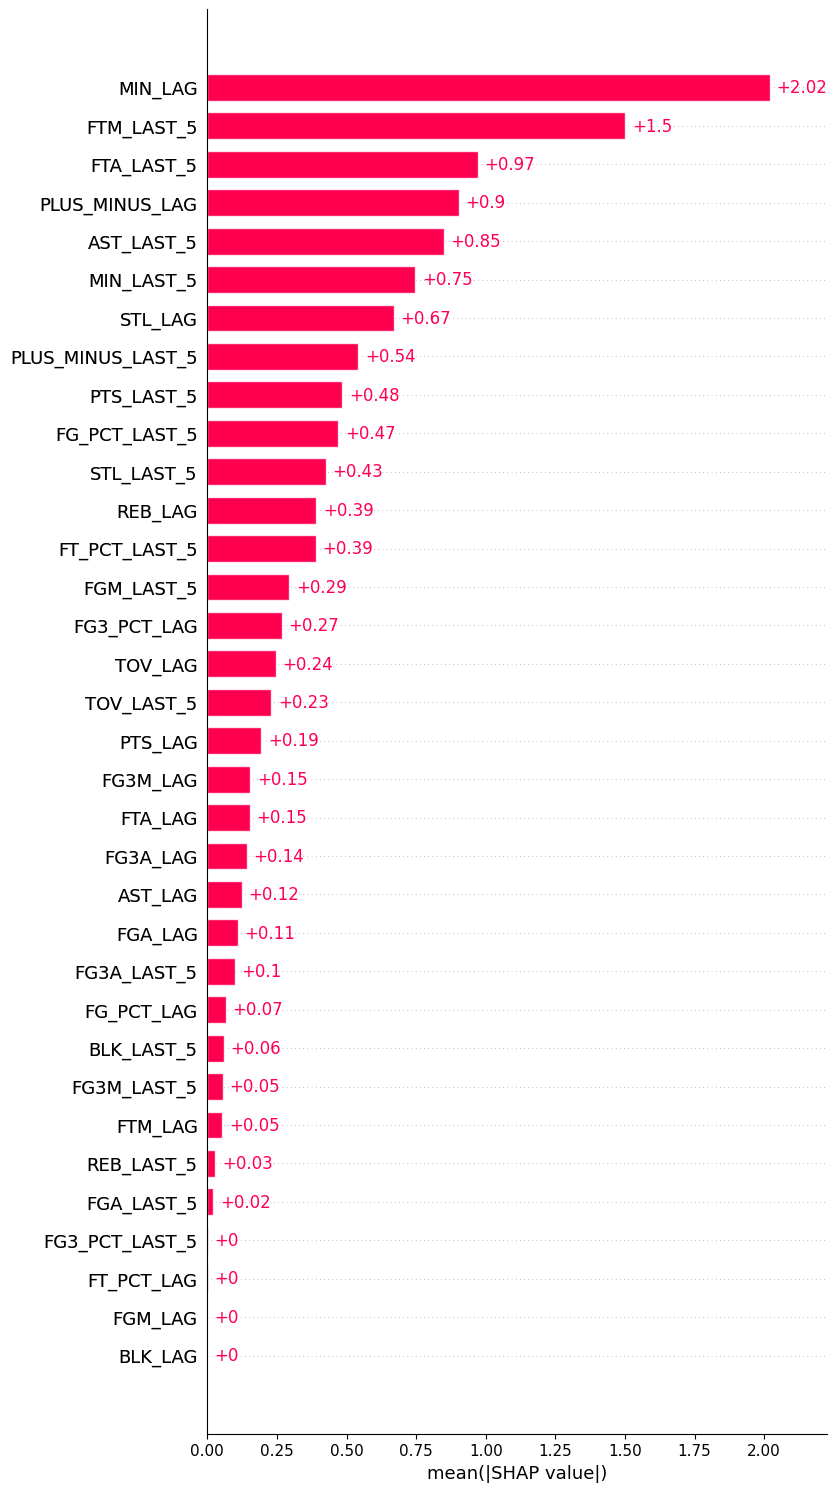

In [8]:
# Plot baseline model
shap.plots.bar(modeler.shap_values(), max_display=100)

In [10]:
# Hyperparameter Tuning
space = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
}

hpt = HyperParamTuner(modeler, space, SEED)
best = hpt.optimize(250)
best

  0%|          | 0/250 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random._generator.Generator' object has no attribute 'randint'

In [ ]:
modeler.train(best)
rmse['tuned_model'] = modeler.rmse()
rmse

In [ ]:
shap.plots.bar(modeler.shap_values(), max_display=100)